In [40]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
sentiment_file = 'SentiWord_Dict.txt'
sentiment_df = pd.read_csv(sentiment_file, delimiter='\t', header=None)


def get_sentiment_score(sentence):
    words = komoran.pos(sentence)# 형태소 분석
    score = 0
    for word, pos in words:
        if pos in ['VA', 'VV', 'VX', 'VCP', 'VCN', 'MAG']:# 감성단어인 경우
            found = sentiment_df[sentiment_df[0] == word]# 단어 검색
            if not found.empty:# 단어가 존재하는 경우
                polarity = found.iloc[0, 1]# 극성(긍정/부정) 확인
                if polarity == 'P':
                    score += 1# 긍정일 경우 감성점수 +1
                elif polarity == 'N':
                    score -= 1# 부정일 경우 감성점수 -1
    return score

sentence = '오늘 날씨가 좋아서 기분이 좋다'
score = get_sentiment_score(sentence)
print(score)# 2



0


In [53]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
sentiment_file = 'SentiWord_Dict.txt'
sentiment_df = pd.read_csv(sentiment_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_sentiment_score(sentence):
    words = komoran.morphs(sentence)  # 형태소 분석, morphs 함수를 사용하여 형태소의 기본형을 추출
    score = 0
    for word in words:
        found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
        if not found.empty:
            polarity = found.iloc[0, 1]
            if polarity == 'P':
                score += 1
            elif polarity == 'N':
                score -= 1
    return score

sentence = '오늘 날씨가 좋아서 기분이 좋다'
print(sentiment_df.head())
print(komoran.morphs(sentence))

for word in komoran.morphs(sentence):
    found = sentiment_df[sentiment_df[0] == word]
    print(f"Word: {word}, Found: {not found.empty}")


print(score)  # 2

sentence = '오늘 날씨가 좋아서 기분이 좋다'
words = komoran.morphs(sentence)


       0    1
0    (-;  1.0
1  (;_;) -1.0
2   (^^)  1.0
3  (^-^)  1.0
4   (^^*  1.0
['오늘', '날씨', '가', '좋아서', '기분', '이', '좋', '다']
Word: 오늘, Found: False
Word: 날씨, Found: False
Word: 가, Found: False
Word: 좋아서, Found: True
Word: 기분, Found: False
Word: 이, Found: False
Word: 좋, Found: False
Word: 다, Found: False
0


In [70]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
sentiment_file = 'SentiWord_Dict.txt'
sentiment_df = pd.read_csv(sentiment_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_sentiment_score(sentence):
    words = komoran.morphs(sentence)  # 형태소 분석, morphs 함수를 사용하여 형태소의 기본형을 추출
    score = 0
    for word in words:
        found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
        if not found.empty:
            polarity = found.iloc[0, 1]
            score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함

    return score

sentence = '오늘 날씨가 좋아서 기분이 좋다 좋아서 가닐가닐하다'
print(sentiment_df.head())
print(komoran.morphs(sentence))

for word in komoran.morphs(sentence):
    found = sentiment_df[sentiment_df[0] == word]
    print(f"Word: {word}, Found: {not found.empty}")

score = get_sentiment_score(sentence)
print(score)  # 2


       0    1
0    (-;  1.0
1  (;_;) -1.0
2   (^^)  1.0
3  (^-^)  1.0
4   (^^*  1.0
['오늘', '날씨', '가', '좋아서', '기분', '이', '좋', '다', '좋아서', '가', '닐', '가니', 'ㄹ', '하', '다']
Word: 오늘, Found: False
Word: 날씨, Found: False
Word: 가, Found: False
Word: 좋아서, Found: True
Word: 기분, Found: False
Word: 이, Found: False
Word: 좋, Found: False
Word: 다, Found: False
Word: 좋아서, Found: True
Word: 가, Found: False
Word: 닐, Found: False
Word: 가니, Found: False
Word: ㄹ, Found: False
Word: 하, Found: False
Word: 다, Found: False
4


In [4]:
from konlpy.tag import Komoran
import pandas as pd
komoran = Komoran()

sentiment_file = 'SentiWord_Dict.txt'
sentiment_df = pd.read_csv(sentiment_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_sentiment_score(sentence):
    words = sentence.split()  # 띄어쓰기를 기준으로 단어 분리
    score = 0
    for word in words:
        found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
        if not found.empty:
            polarity = found.iloc[0, 1]
            score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함

    return score

df = pd.read_csv('bigdata.csv', encoding='utf-8')

sentence = '이거 진짜 좋다 ㅠㅠ 드디어 실현되는구나 나는 수업시간에 아이디어 내기할때 카페 플라스틱컵 재활용시 적립해주는 앱으로 아이디어 스케치 했는데 진짜 체계적으로 만들었는데 유사 아이디어가 드디어 실현되는구나'
print(sentiment_df.head())
print(sentence.split())

for word in sentence.split():
    found = sentiment_df[sentiment_df[0] == word]
    print(f"Word: {word}, Found: {not found.empty}")

print(score)  # 2


       0    1
0    (-;  1.0
1  (;_;) -1.0
2   (^^)  1.0
3  (^-^)  1.0
4   (^^*  1.0
['이거', '진짜', '좋다', 'ㅠㅠ', '드디어', '실현되는구나', '나는', '수업시간에', '아이디어', '내기할때', '카페', '플라스틱컵', '재활용시', '적립해주는', '앱으로', '아이디어', '스케치', '했는데', '진짜', '체계적으로', '만들었는데', '유사', '아이디어가', '드디어', '실현되는구나']
Word: 이거, Found: False
Word: 진짜, Found: False
Word: 좋다, Found: True
Word: ㅠㅠ, Found: False
Word: 드디어, Found: False
Word: 실현되는구나, Found: False
Word: 나는, Found: False
Word: 수업시간에, Found: False
Word: 아이디어, Found: False
Word: 내기할때, Found: False
Word: 카페, Found: False
Word: 플라스틱컵, Found: False
Word: 재활용시, Found: False
Word: 적립해주는, Found: False
Word: 앱으로, Found: False
Word: 아이디어, Found: False
Word: 스케치, Found: False
Word: 했는데, Found: False
Word: 진짜, Found: False
Word: 체계적으로, Found: False
Word: 만들었는데, Found: False
Word: 유사, Found: False
Word: 아이디어가, Found: False
Word: 드디어, Found: False
Word: 실현되는구나, Found: False


NameError: name 'score' is not defined

In [6]:
from konlpy.tag import Komoran
import pandas as pd
komoran = Komoran()
sentiment_file = 'dictionary.csv'
sentiment_df = pd.read_csv(sentiment_file, delimiter=',', header=None, encoding='utf-8')  # 인코딩 지정
def get_sentiment_score(comment):
    if isinstance(comment, str):  # ‘comment’가 문자열인지 확인
        words = comment.split()  # 띄어쓰기를 기준으로 단어 분리
        score = 0
        for word in words:
            found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
            if not found.empty:
                #print(found)
                polarity = found.iloc[0, 1]
                # print('polarity', polarity)
                # print('--------')
                score += int(polarity)  # ‘P’이면 1, ‘N’이면 -1을 더함
        return score
    else:
        return 0  # ‘comment’가 문자열이 아닌 경우 (NaN 등), 감정 점수로 0을 반환
# ‘bigdata.csv’ 파일의 ‘comment’ 컬럼을 분석
df = pd.read_csv('bigdata.csv', encoding='utf-8')
#df['sentiment_score'] = df['comment'].apply(get_sentiment_score)



score=get_sentiment_score('이거 진짜 좋다 ㅠㅠ 드디어 실현되는구나 나는 수업시간에 아이디어 내기할때 카페 플라스틱컵 재활용시 적립해주는 앱으로 아이디어 스케치 했는데 진짜 체계적으로 만들었는데 유사 아이디어가 드디어 실현되는구나')

for word in sentence.split():
    found = sentiment_df[sentiment_df[0] == word]
    print(f"Word: {word}, Found: {not found.empty}")
    

print(score)
# 결과의 일부만 출력
# print(df[['comment', 'sentiment_score']])
# df.to_csv("result.csv", index=False, encoding='utf-8-sig')

Word: 이거, Found: False
Word: 진짜, Found: False
Word: 좋다, Found: False
Word: ㅠㅠ, Found: False
Word: 드디어, Found: True
Word: 실현되는구나, Found: False
Word: 나는, Found: False
Word: 수업시간에, Found: False
Word: 아이디어, Found: False
Word: 내기할때, Found: False
Word: 카페, Found: False
Word: 플라스틱컵, Found: False
Word: 재활용시, Found: False
Word: 적립해주는, Found: False
Word: 앱으로, Found: False
Word: 아이디어, Found: False
Word: 스케치, Found: False
Word: 했는데, Found: False
Word: 진짜, Found: False
Word: 체계적으로, Found: False
Word: 만들었는데, Found: False
Word: 유사, Found: False
Word: 아이디어가, Found: False
Word: 드디어, Found: True
Word: 실현되는구나, Found: False
4


In [2]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
politics_file = 'dictionary.csv'
politics_df = pd.read_csv(politics_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_politics_score(comment):
    if isinstance(comment, str):  # 'comment'가 문자열인지 확인
        words = comment.split()  # 띄어쓰기를 기준으로 단어 분리
        score = 0
        for word in words:
            found = politics_df[politics_df[0] == word]  # 단어 검색
            if not found.empty:
                polarity = found.iloc[0, 1]
                score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함
        return score
    else:
        return 0  # 'comment'가 문자열이 아닌 경우 (NaN 등), 감정 점수로 0을 반환

# 'bigdata.csv' 파일의 'comment' 컬럼을 분석
df = pd.read_csv('bigdata_sentiment_score.csv', encoding='utf-8')

# 감정 점수 계산 및 새로운 컬럼 추가
df['politics_score'] = df['comment'].apply(get_politics_score)

# 결과의 일부만 출력
print(df[['comment', 'politics_score']])

# 새로운 CSV 파일로 저장

df.to_csv('bigdata_with_sentiment_politics.csv', encoding='utf-8', index=False)






                                                comment  politics_score
0     연애인나 스포츠 스타는 각별히 행동과 언행을 조심해야 할 필요가 있습니다그들은 대중...               0
1     스트레스 이런 업장업주들 싹다 훗날 어렵다 힘들다 죽겠다 이런얘기 못하게 상황 거부...               0
2     공산 행정 정치 범죄 무지 무능 단체 범죄 사라져야한다 코르나 마스크 생각 난다 무...               0
3                  불평 불만 갖지마라 먼 미래도 아니다 고작 몇년안에 뒤지기 싫으면               0
4     이것도 quot문재앙quot 작품 마트 박스 포장 못하게 테이프 없애고 이면도로 5...               0
...                                                 ...             ...
7248  이건 웬 어마무시한 똘아이냐 다회용품이 더 깨끗하다고 소비자맞아 소비자를 위해 깨끗...               0
7249  개인적으로 유델리 라는 커피숍 브랜드가 제일 좋다 생각함 일회용품이 아닌 텀블러에 ...               0
7250  자영업자들아  니들이 편하게 돈벌고 인력안쓰고 더 이익을 챙기려니까 환경은 더 나빠...               0
7251  이러한 플라스틱 및 일회용 용기들의 규제들은 분명히 좋은 법안이 맞습니다 허나 플라...               0
7252  역행도 어이없지만 제대로 된 자료와 통계가 아닌 일부만을 위한 정책은 좋은 정책이라...               0

[7253 rows x 2 columns]


In [3]:
from konlpy.tag import Komoran
import pandas as pd
komoran = Komoran()
politics_file = 'dictionary.csv'
politics_df = pd.read_csv(politics_file, delimiter=',', header=None, encoding='utf-8')  # 인코딩 지정
def get_spolitics_score(comment):
    if isinstance(comment, str):  # ‘comment’가 문자열인지 확인
        words = comment.split()  # 띄어쓰기를 기준으로 단어 분리
        score = 0
        for word in words:
            found = politics_df[politics_df[0] == word]  # 단어 검색
            if not found.empty:
                #print(found)
                polarity = found.iloc[0, 1]
                # print('polarity', polarity)
                # print('--------')
                score += int(polarity)  # ‘P’이면 1, ‘N’이면 -1을 더함
        return score
    else:
        return 0  # ‘comment’가 문자열이 아닌 경우 (NaN 등), 감정 점수로 0을 반환


# ‘bigdata.csv’ 파일의 ‘comment’ 컬럼을 분석
df = pd.read_csv('bigdata_sentiment_score.csv', encoding='utf-8')
df['politics_score'] = df['comment'].apply(get_politics_score)
# 결과의 일부만 출력
print(df[['comment', 'politics_score']])
df.to_csv("result.csv", index=False, encoding='utf-8-sig')

df.to_csv('bigdata_with_sentiment_politics.csv', encoding='utf-8', index=False)



                                                comment  politics_score
0     연애인나 스포츠 스타는 각별히 행동과 언행을 조심해야 할 필요가 있습니다그들은 대중...               1
1     스트레스 이런 업장업주들 싹다 훗날 어렵다 힘들다 죽겠다 이런얘기 못하게 상황 거부...              -1
2     공산 행정 정치 범죄 무지 무능 단체 범죄 사라져야한다 코르나 마스크 생각 난다 무...               0
3                  불평 불만 갖지마라 먼 미래도 아니다 고작 몇년안에 뒤지기 싫으면               0
4     이것도 quot문재앙quot 작품 마트 박스 포장 못하게 테이프 없애고 이면도로 5...              -1
...                                                 ...             ...
7248  이건 웬 어마무시한 똘아이냐 다회용품이 더 깨끗하다고 소비자맞아 소비자를 위해 깨끗...               0
7249  개인적으로 유델리 라는 커피숍 브랜드가 제일 좋다 생각함 일회용품이 아닌 텀블러에 ...               0
7250  자영업자들아  니들이 편하게 돈벌고 인력안쓰고 더 이익을 챙기려니까 환경은 더 나빠...               0
7251  이러한 플라스틱 및 일회용 용기들의 규제들은 분명히 좋은 법안이 맞습니다 허나 플라...               0
7252  역행도 어이없지만 제대로 된 자료와 통계가 아닌 일부만을 위한 정책은 좋은 정책이라...              -4

[7253 rows x 2 columns]


In [55]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
politics_file = 'bigdata_with_sentiment_score.csv'
politics_df = pd.read_csv(politics_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_politics_score(comment):
    if isinstance(comment, str):  # 'comment'가 문자열인지 확인
        words = comment.split()  # 띄어쓰기를 기준으로 단어 분리
        score = 0
        for word in words:
            found = politics_df[politics_df[0] == word]  # 단어 검색
            if not found.empty:
                polarity = found.iloc[0, 1]
                score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함
        return score
    else:
        return 0  # 'comment'가 문자열이 아닌 경우 (NaN 등), 감정 점수로 0을 반환

# 'bigdata.csv' 파일의 'comment' 컬럼을 분석
df = pd.read_csv('bigdata.csv', encoding='utf-8')
df['politics_score'] = df['comment'].apply(get_politics_score)

# 결과 출력
print(df[['comment', 'politics_score']])

# 새로운 CSV 파일로 저장
df.to_csv('bigdata_with_sentiment_politics.csv', encoding='utf-8', index=False)



                                                comment  politics_score
0                                         우산 비닐은 선넘지않았나               0
1                                        아니 빨대는 어쩌라는 거야               0
2                                         취소 된걸로 알고 있는뎁               0
3                                        테이크아웃 어째한다는 건데               0
4                      편의점에서 컵라면 먹으려면 쇠젓가락 들고 다녀야하네ㅋㅋㅋㅋ               0
...                                                 ...             ...
7248  이건 웬 어마무시한 똘아이냐 다회용품이 더 깨끗하다고 소비자맞아 소비자를 위해 깨끗...               0
7249                                            안와도 되지롱               0
7250  일회 용품 안써도 되요 불편해도요 지구에서 가장 못사는 나라보다 플라스틱을 더 많이...               0
7251  에코백을 131번 재사용해야 비닐봉지 1장 쓰는 것과 효율이 같다는데 혹시 에코백 ...               0
7252                                          일회용품 전면금지               0

[7253 rows x 2 columns]


In [54]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
politics_file = 'dictionary.csv'
politics_df = pd.read_csv(politics_file, delimiter='\t', header=None, encoding='utf-8')

def get_politics_score(comment):
    if isinstance(comment, str):
        morphs = komoran.morphs(comment)  # 형태소분석을 통해 형태소 추출
        score = 0
        for morph in morphs:
            found = politics_df[politics_df[0] == morph]  # 형태소를 기준으로 단어 검색
            if not found.empty:
                polarity = found.iloc[0, 1]
                score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함
        return score
    else:
        return 0

# 'bigdata.csv' 파일의 'comment' 컬럼을 분석
df = pd.read_csv('bigdata.csv', encoding='cp949')  # 파일의 실제 인코딩에 맞게 수정
df['politics_score'] = df['comment'].apply(get_politics_score)

# 결과 출력
print(df[['comment', 'politics_score']])

# 새로운 CSV 파일로 저장
df.to_csv('bigdata_with_politics.csv', encoding='utf-8', index=False)


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 28: illegal multibyte sequence

In [46]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
politics_file = 'dictionary.csv'
politics_df = pd.read_csv(politics_file, delimiter='\t', header=None, encoding='utf-8')

def get_politics_score(comment, politics_df):
    if isinstance(comment, str):
        words = comment.split()
        score = 0
        for word in words:
            found = politics_df[politics_df[0] == word]
            if not found.empty:
                polarity = found.iloc[0, 1]
                score += int(polarity)
        return score
    else:
        return 0

df = pd.read_csv('bigdata.csv', encoding='utf-8')
df['politics_score'] = df['comment'].apply(get_politics_score, politics_df=politics_df)

# 겹치는 단어 카운트 저장
overlap_counts = politics_df[0].isin(df['comment'].str.split(expand=True).stack()).sum()

# 결과 출력
print("Overlap Counts:", overlap_counts)

# 새로운 CSV 파일로 저장
df.to_csv('bigdata_with_politics.csv', encoding='utf-8', index=False)


Overlap Counts: 0


In [79]:
from konlpy.tag import Komoran
import pandas as pd

komoran = Komoran()
sentiment_file = 'SentiWord_Dict.txt'
sentiment_df = pd.read_csv(sentiment_file, delimiter='\t', header=None, encoding='utf-8')  # 인코딩 지정

def get_sentiment_score(comment):
    if isinstance(comment, str):  # 'comment'가 문자열인지 확인
        words = comment.split()  # 띄어쓰기를 기준으로 단어 분리
        score = 0
        for word in words:
            found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
            if not found.empty:
                polarity = found.iloc[0, 1]
                score += int(polarity)  # 'P'이면 1, 'N'이면 -1을 더함
        return score
    else:
        return 0  # 'comment'가 문자열이 아닌 경우 (NaN 등), 감정 점수로 0을 반환

# 'bigdata.csv' 파일의 'comment' 컬럼을 분석
df = pd.read_csv('bigdata.csv', encoding='utf-8')
df['sentiment_score'] = df['comment'].apply(get_sentiment_score)

# 결과의 일부만 출력
print(df[['comment', 'sentiment_score']])

                                                comment  sentiment_score
0                                         우산 비닐은 선넘지않았나                0
1                                        아니 빨대는 어쩌라는 거야                0
2                                         취소 된걸로 알고 있는뎁                0
3                                        테이크아웃 어째한다는 건데                0
4                      편의점에서 컵라면 먹으려면 쇠젓가락 들고 다녀야하네ㅋㅋㅋㅋ                0
...                                                 ...              ...
7248  이건 웬 어마무시한 똘아이냐 다회용품이 더 깨끗하다고 소비자맞아 소비자를 위해 깨끗...                4
7249                                            안와도 되지롱                0
7250  일회 용품 안써도 되요 불편해도요 지구에서 가장 못사는 나라보다 플라스틱을 더 많이...               -2
7251  에코백을 131번 재사용해야 비닐봉지 1장 쓰는 것과 효율이 같다는데 혹시 에코백 ...                0
7252                                          일회용품 전면금지                0

[7253 rows x 2 columns]


In [5]:
import pandas as pd

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')

# 감정점수가 큰 댓글 100개 출력
top_100_positive_comments = df.nlargest(100, 'sentiment_score')[['comment', 'sentiment_score']]
print("감정점수가 큰 댓글 100개:\n", top_100_positive_comments)

# 감정점수가 작은 댓글 100개 출력
top_100_negative_comments = df.nsmallest(100, 'sentiment_score')[['comment', 'sentiment_score']]
print("\n감정점수가 작은 댓글 100개:\n", top_100_negative_comments)

# 전체 데이터의 총 감정점수평균 출력
average_sentiment_score = df['sentiment_score'].mean()
print("\n전체 데이터의 총 감정점수평균:", average_sentiment_score)


감정점수가 큰 댓글 100개:
                                                 comment  sentiment_score
543   역행도 어이없지만 제대로 된 자료와 통계가 아닌 일부만을 위한 정책은 좋은 정책이라...               12
6562  이러한 플라스틱 및 일회용 용기들의 규제들은 분명히 좋은 법안이 맞습니다 허나 플라...                6
2556  개인적으로 유델리 라는 커피숍 브랜드가 제일 좋다 생각함 일회용품이 아닌 텀블러에 ...                5
3160  자영업자들아  니들이 편하게 돈벌고 인력안쓰고 더 이익을 챙기려니까 환경은 더 나빠...                5
854                   월에도 따뜻한 기후위기 시대에 역행하는 정부 대단하다 대단해                4
...                                                 ...              ...
1946  userwg2pr2uq7q 저있는곳은 잘 포장되어서 완충제 잘 쌓여서 와서요  지역...                2
1948  문재앙때 대형마트 포장용 테이프 막았음 그래서 환경살아낫나 이제는 종이빨때 강제사용...                2
1966  뭔가 정책을 할 때는 이 사정 저 사정 봐주면 안됨 손익따져봐고 이익이 더 많다고 ...                2
1988                          하긴해야하는데 난감하네 좋은 정책이 수립되기를                2
2027  적어도 불편한거 아는데 이런 인식의 변화가 필요하다장사 편하게 하고 싶은 거 같은데...                2

[100 rows x 2 columns]

감정점수가 작은 댓글 100개:
                                                 comment  senti

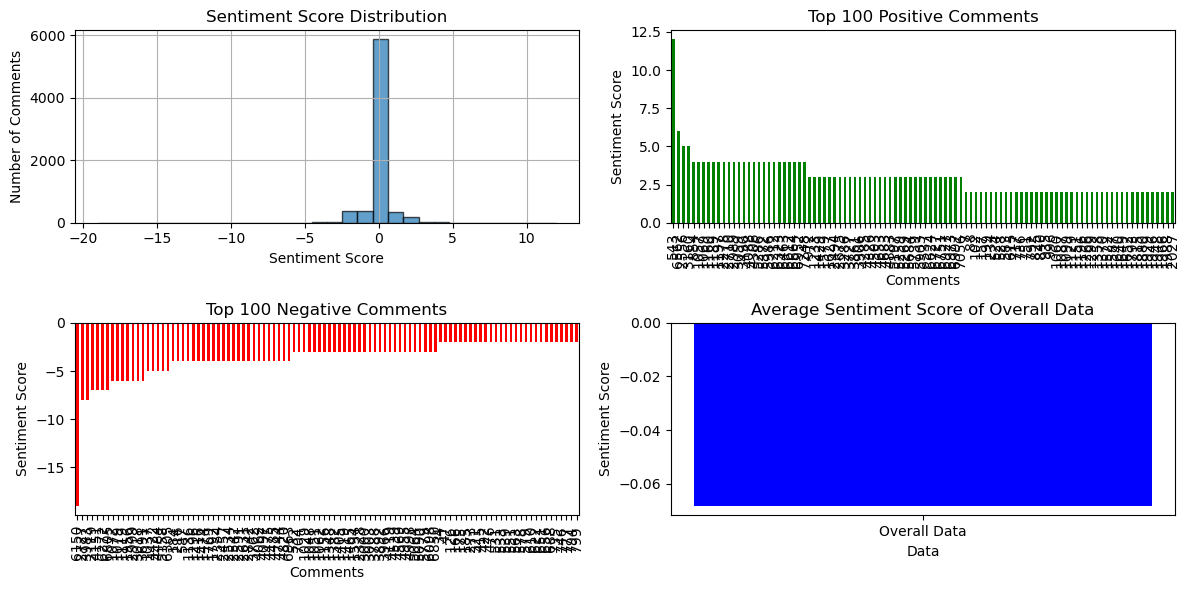

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')


# 전체 데이터의 총 감정점수평균
average_sentiment_score = df['sentiment_score'].mean()

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램 - 감정점수 분포
plt.subplot(2, 2, 1)
df['sentiment_score'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')


# 전체 데이터의 총 감정점수평균 시각화
plt.subplot(2, 2, 4)
plt.bar(['Overall Data'], [average_sentiment_score], color='blue')
plt.title('Average Sentiment Score of Overall Data')
plt.xlabel('Data')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()


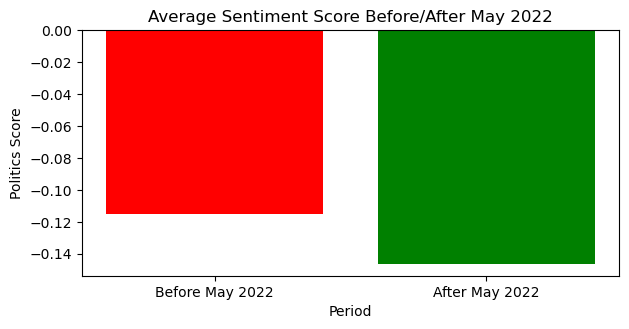

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the entire data including the 'comment' column from 'bigdata_with_sentiment_score.csv' file
df = pd.read_csv('bigdata_with_sentiment_politics.csv', encoding='utf-8')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the data based on May 2022
data_before_may = df[df['date'] < '2022-05-01']
data_after_may = df[df['date'] >= '2022-05-01']

# Calculate the average sentiment scores
average_sentiment_before_may = data_before_may['sentiment_score'].mean()
average_sentiment_after_may = data_after_may['sentiment_score'].mean()

# Visualization
plt.figure(figsize=(12, 6))



# Average sentiment scores before and after May 2022 visualization
plt.subplot(2, 2, 4)
plt.bar(['Before May 2022', 'After May 2022'], [average_sentiment_before_may, average_sentiment_after_may], color=['red', 'green'])
plt.title('Average Sentiment Score Before/After May 2022')
plt.xlabel('Period')
plt.ylabel('Politics Score')

plt.tight_layout()
plt.show()


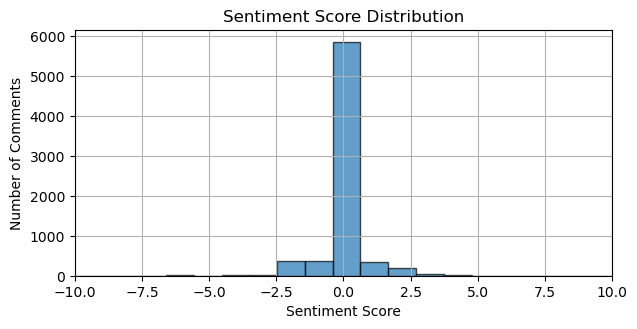

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')

# 감정점수가 큰 댓글 100개
top_100_positive_comments = df.nlargest(100, 'sentiment_score')[['comment', 'sentiment_score']]

# 감정점수가 작은 댓글 100개
top_100_negative_comments = df.nsmallest(100, 'sentiment_score')[['comment', 'sentiment_score']]

# 전체 데이터의 총 감정점수평균
average_sentiment_score = df['sentiment_score'].mean()

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램 - 감정점수 분포
plt.subplot(2, 2, 1)
df['sentiment_score'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.xlim(-10, 10)  # x축 범위를 -10에서 10으로 설정

plt.tight_layout()
plt.show()


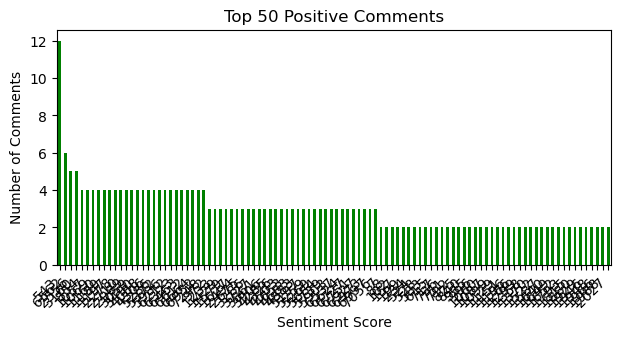

In [22]:
# 시각화
plt.figure(figsize=(12, 6))

# 상위 100개 긍정 댓글 시각화
plt.subplot(2, 2, 2)
top_100_positive_comments['sentiment_score'].plot(kind='bar', color='green')
plt.title('Top 50 Positive Comments')
plt.xlabel('Sentiment Score')  # x축 레이블 수정
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


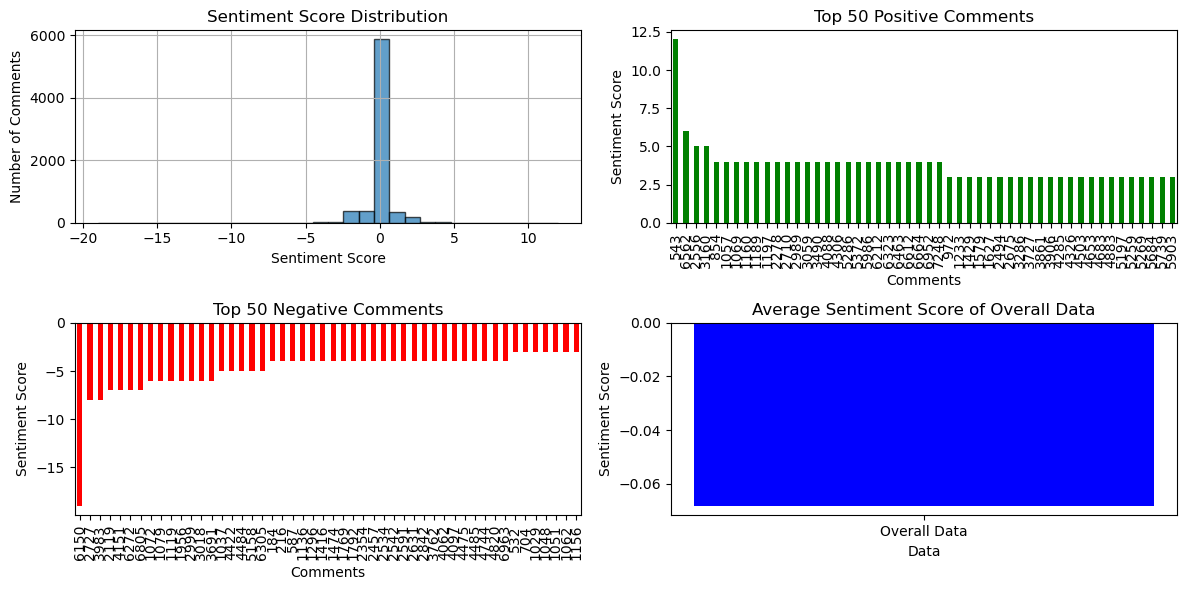

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')

# 감정점수가 큰 댓글 50개
top_50_positive_comments = df.nlargest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 감정점수가 작은 댓글 50개
top_50_negative_comments = df.nsmallest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 전체 데이터의 총 감정점수평균
average_sentiment_score = df['sentiment_score'].mean()

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램 - 감정점수 분포
plt.subplot(2, 2, 1)
df['sentiment_score'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')

# 상위 50개 긍정 댓글 시각화
plt.subplot(2, 2, 2)
top_50_positive_comments['sentiment_score'].plot(kind='bar', color='green')
plt.title('Top 50 Positive Comments')
plt.xlabel('Comments')
plt.ylabel('Sentiment Score')

# 하위 50개 부정 댓글 시각화
plt.subplot(2, 2, 3)
top_50_negative_comments['sentiment_score'].plot(kind='bar', color='red')
plt.title('Top 50 Negative Comments')
plt.xlabel('Comments')
plt.ylabel('Sentiment Score')

# 전체 데이터의 총 감정점수평균 시각화
plt.subplot(2, 2, 4)
plt.bar(['Overall Data'], [average_sentiment_score], color='blue')
plt.title('Average Sentiment Score of Overall Data')
plt.xlabel('Data')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()


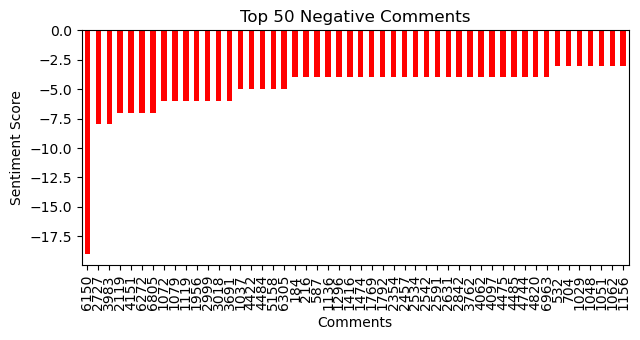

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')

# 감정점수가 큰 댓글 50개
top_50_positive_comments = df.nlargest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 감정점수가 작은 댓글 50개
top_50_negative_comments = df.nsmallest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 전체 데이터의 총 감정점수평균
average_sentiment_score = df['sentiment_score'].mean()

# 시각화
plt.figure(figsize=(12, 6))



# 하위 50개 부정 댓글 시각화
plt.subplot(2, 2, 3)
top_50_negative_comments['sentiment_score'].plot(kind='bar', color='red')
plt.title('Top 50 Negative Comments')
plt.xlabel('Comments')
plt.ylabel('Sentiment Score')



plt.tight_layout()
plt.show()


In [31]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 2.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.3-cp311-cp311-linux_aarch64.whl size=190836 sha256=7f5c2b0c563769160510d98c281a67d0939f0ca8e7230a6fbffbcd9ed0c67e1c
  Stored in directory: /home/jovyan/.cache/pip/wheels/61/ad/36/e3e19563cc6a65dd0105093e2f839cfff3f26889588d5efc33
Successfully built wordcloud


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

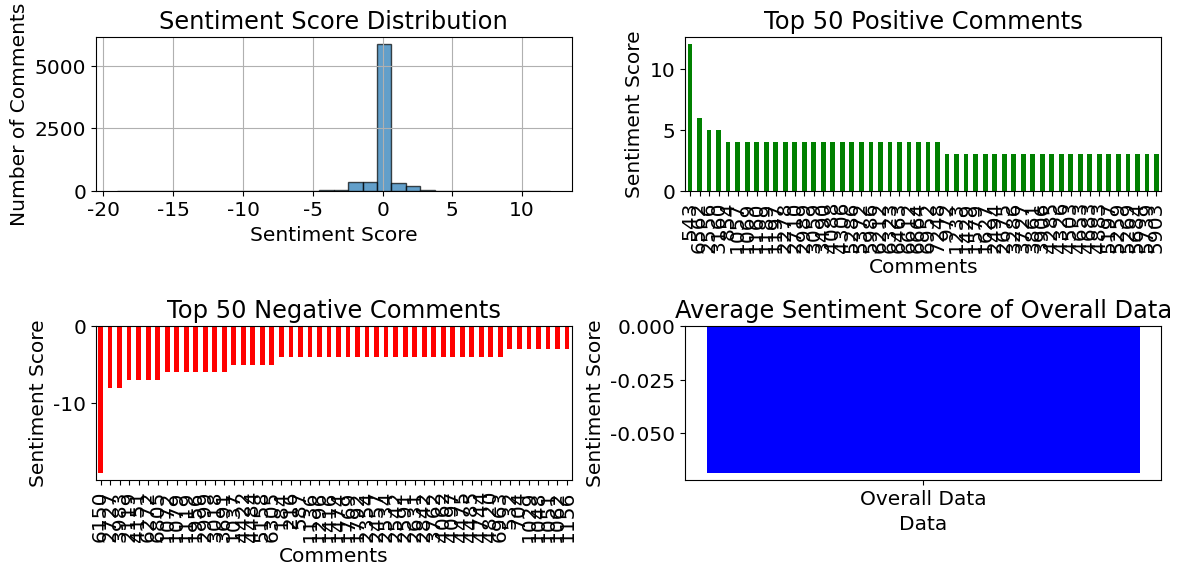

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.


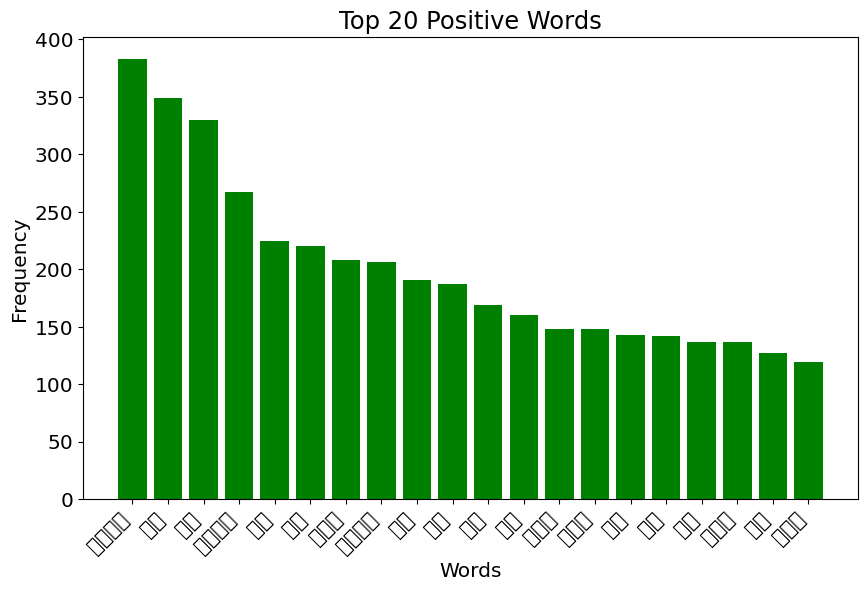

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from current font.
  

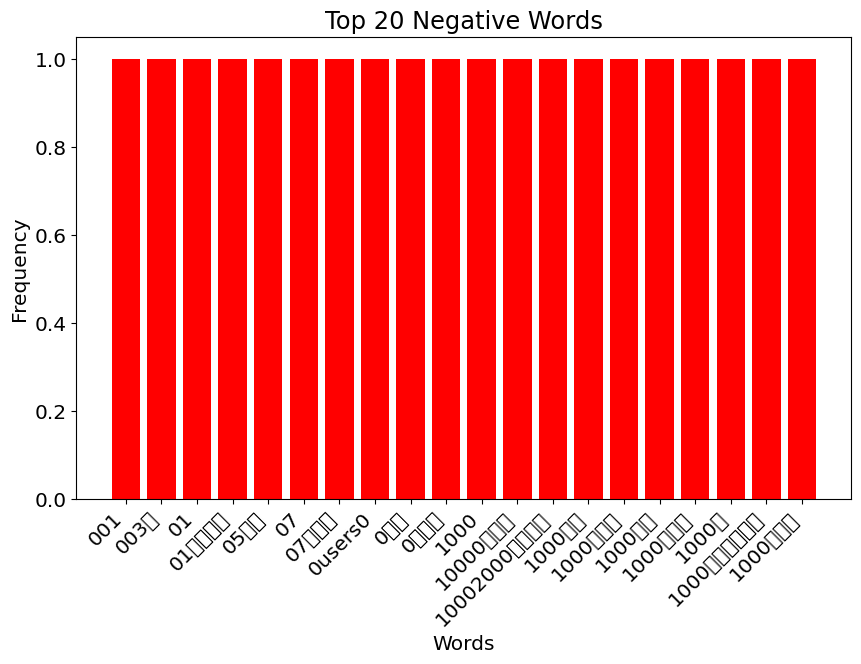

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from matplotlib import font_manager, rc

# 'bigdata_with_sentiment_score.csv' 파일의 'comment' 컬럼을 포함한 전체 데이터를 읽기
df = pd.read_csv('bigdata_with_sentiment_score.csv', encoding='utf-8')

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 감정점수가 큰 댓글 50개
top_50_positive_comments = df.nlargest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 감정점수가 작은 댓글 50개
top_50_negative_comments = df.nsmallest(50, 'sentiment_score')[['comment', 'sentiment_score']]

# 전체 데이터의 총 감정점수평균
average_sentiment_score = df['sentiment_score'].mean()

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램 - 감정점수 분포
plt.subplot(2, 2, 1)
df['sentiment_score'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')

# 상위 50개 긍정 댓글 시각화
plt.subplot(2, 2, 2)
top_50_positive_comments['sentiment_score'].plot(kind='bar', color='green')
plt.title('Top 50 Positive Comments')
plt.xlabel('Comments')
plt.ylabel('Sentiment Score')

# 하위 50개 부정 댓글 시각화
plt.subplot(2, 2, 3)
top_50_negative_comments['sentiment_score'].plot(kind='bar', color='red')
plt.title('Top 50 Negative Comments')
plt.xlabel('Comments')
plt.ylabel('Sentiment Score')

# 전체 데이터의 총 감정점수평균 시각화
plt.subplot(2, 2, 4)
plt.bar(['Overall Data'], [average_sentiment_score], color='blue')
plt.title('Average Sentiment Score of Overall Data')
plt.xlabel('Data')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

# 빈도수가 높은 상위 20개 긍정적인 단어 시각화
vectorizer = CountVectorizer()
all_comments = ' '.join(df['comment'].dropna())
word_freq = vectorizer.fit_transform([all_comments])
word_freq_df = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), word_freq.toarray().flatten())), 
                             columns=['word', 'frequency'])

top_positive_words = word_freq_df.nlargest(20, 'frequency')
plt.figure(figsize=(10, 6))
plt.bar(top_positive_words['word'], top_positive_words['frequency'], color='green')
plt.title('Top 20 Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 빈도수가 높은 상위 20개 부정적인 단어 시각화
top_negative_words = word_freq_df.nsmallest(20, 'frequency')
plt.figure(figsize=(10, 6))
plt.bar(top_negative_words['word'], top_negative_words['frequency'], color='red')
plt.title('Top 20 Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()
